# importing library

In [63]:
import pandas_datareader as web
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [64]:
data = pd.read_csv('opsd_germany_daily.csv')


In [3]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [5]:
data.Date= pd.to_datetime(data.Date)
data.set_index(data.Date, inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 205.5 KB


In [7]:
data.set_index('Date', inplace=True)

In [8]:
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

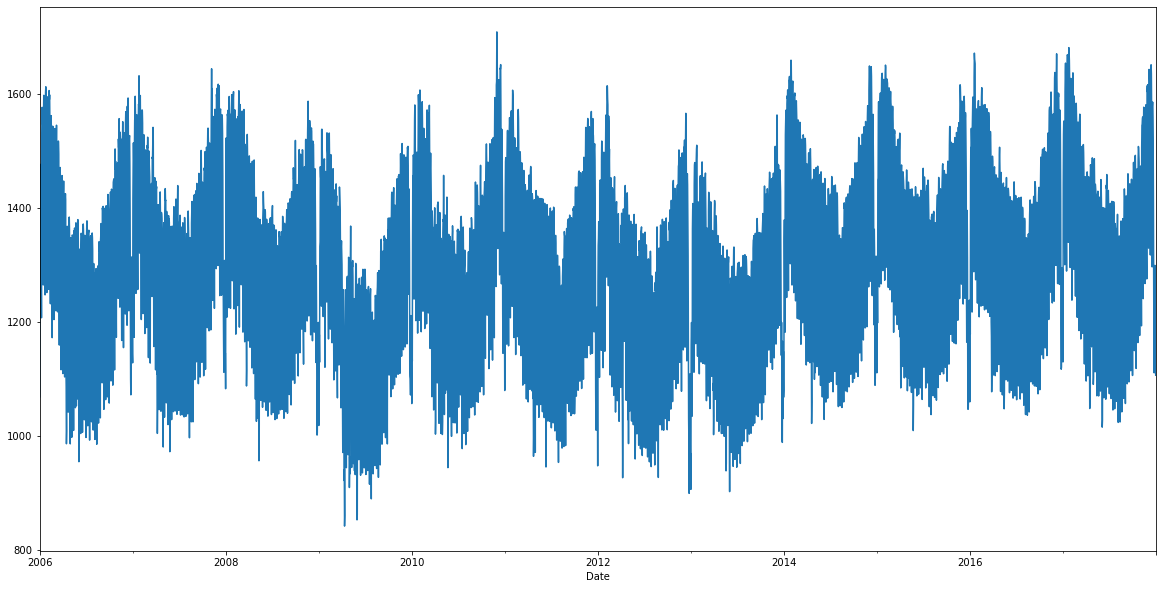

In [9]:
data['Consumption'].plot(figsize=(20,10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

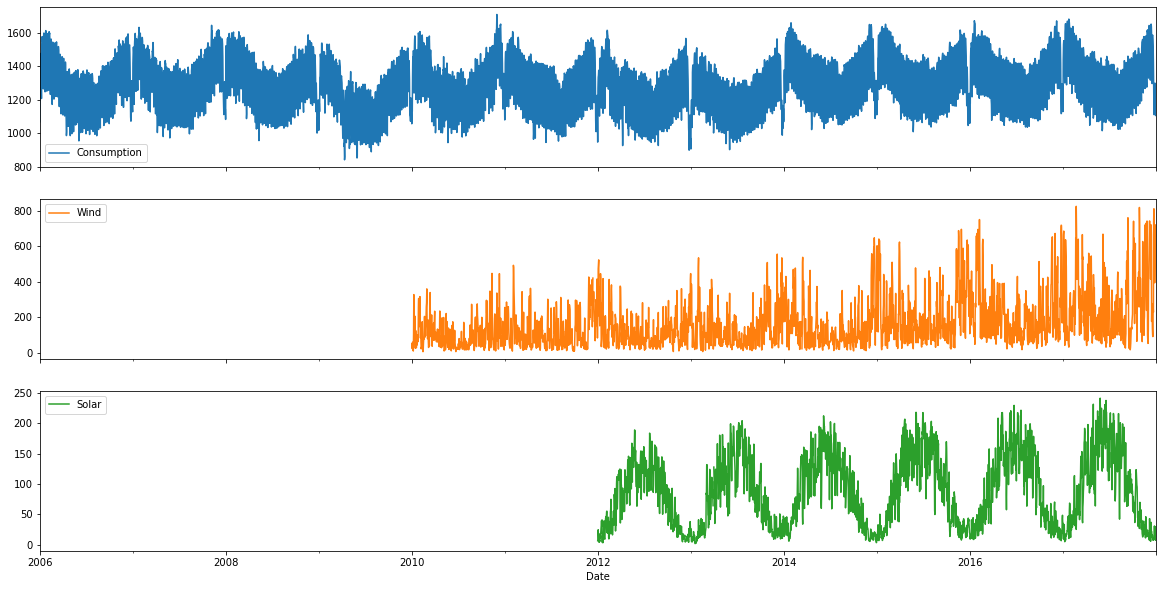

In [10]:
df=['Consumption','Wind','Solar']
data[df].plot(figsize=(20,10),subplots=True)

<AxesSubplot:xlabel='Date'>

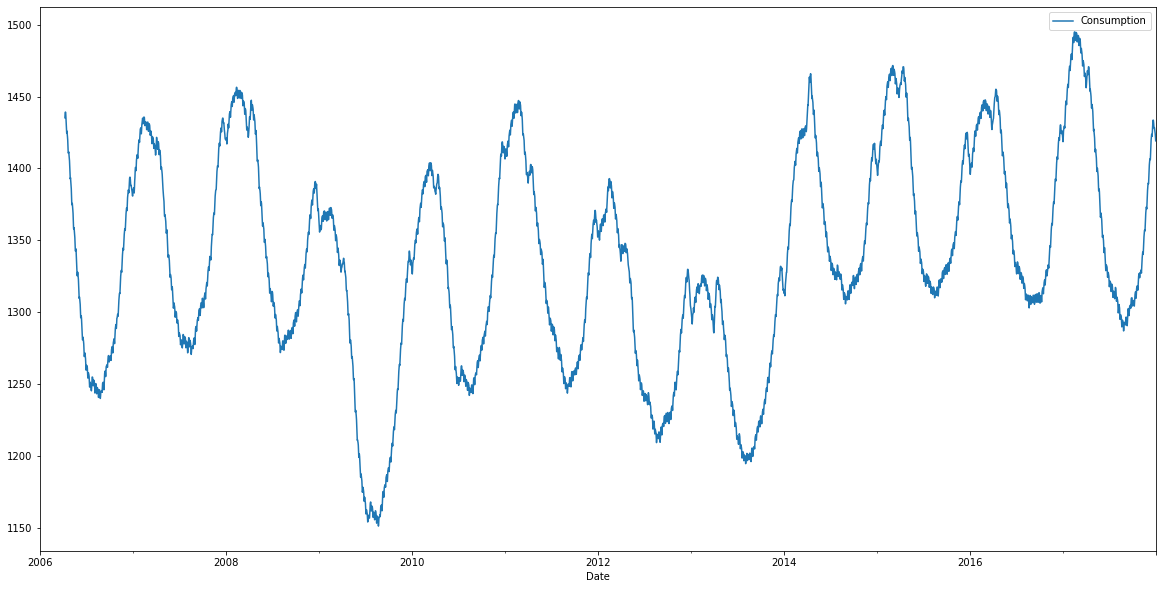

In [11]:
data[['Consumption']].rolling(100).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

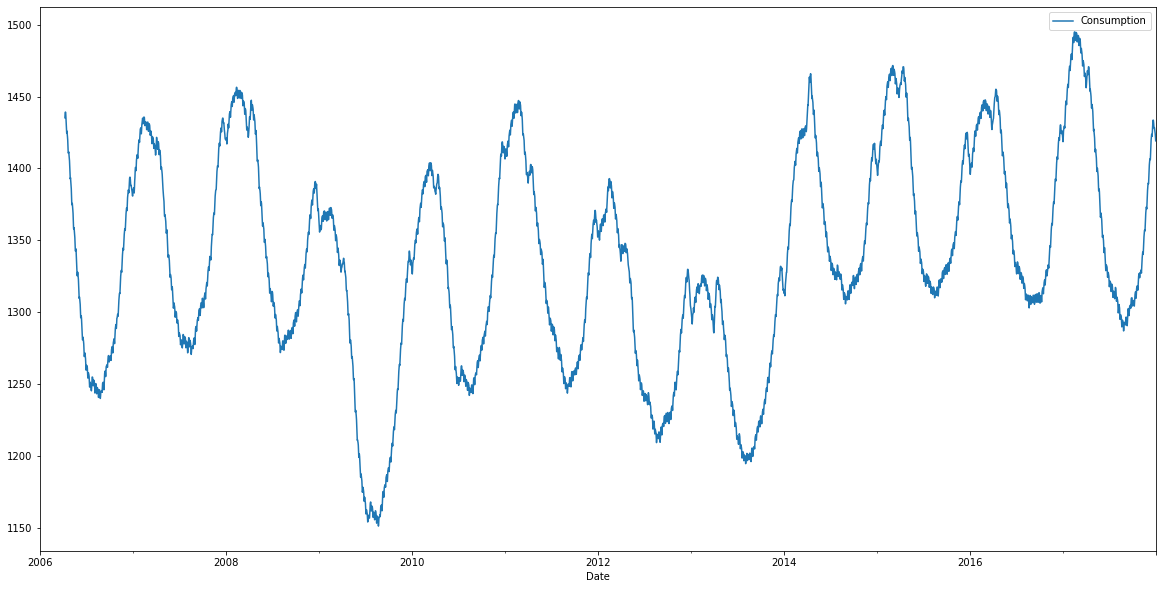

In [12]:
data[['Consumption']].rolling(100).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

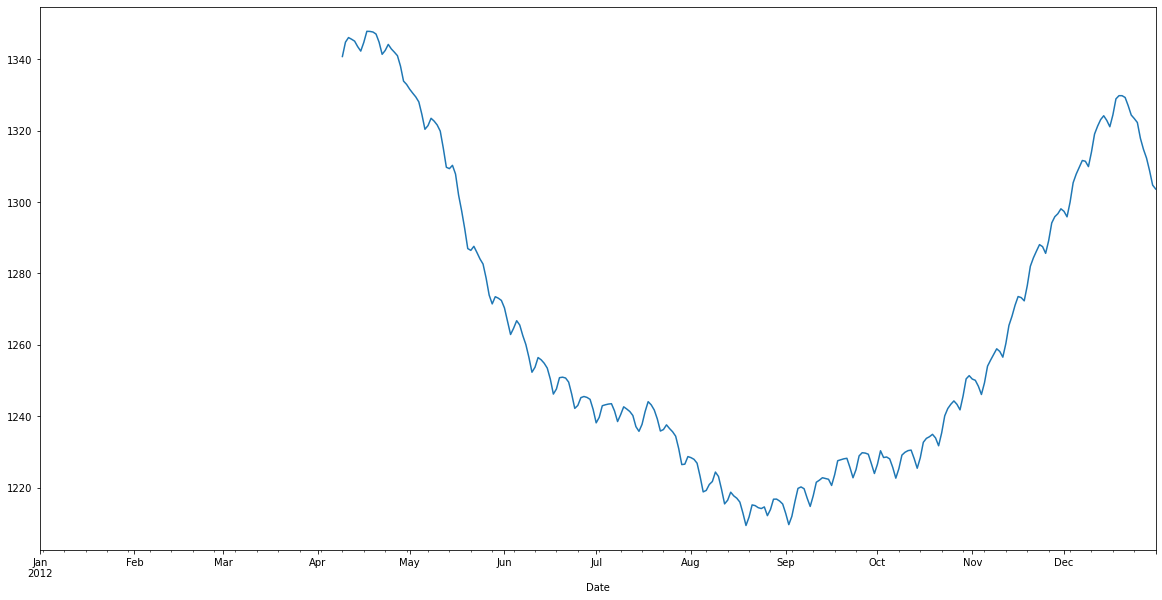

In [13]:
data.loc['2012','Consumption'].rolling(100).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

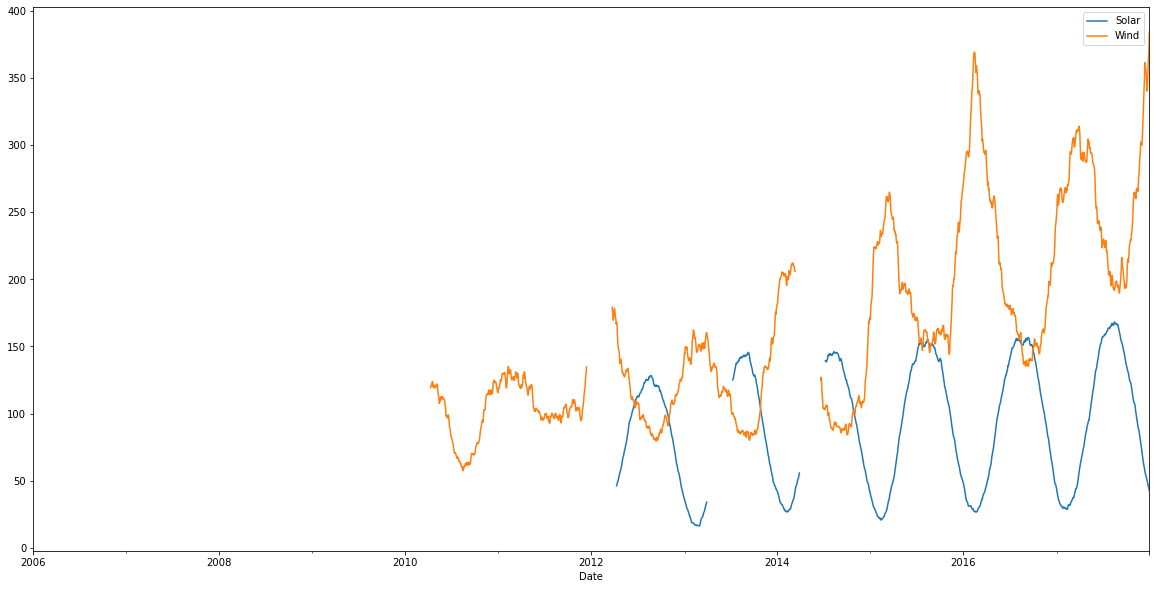

In [14]:
pd.concat([data[['Solar']].rolling(100).mean(),data[['Wind']].rolling(100).mean()],axis=1).plot(figsize=(20,10))

In [24]:
data['Month']= data.index.month
data['Weekday name']=data.index.weekday
data.sample(6)

,Consumption,Wind,Solar,Wind+Solar,year,Month,Weekday name
Date,,,,,,,
2012-12-17,1441.662,46.772,12.489,59.261,2012,12,0
2008-04-26,1183.262,NaN,NaN,NaN,2008,4,5
2015-07-14,1429.539,115.932,108.586,224.518,2015,7,1
2014-10-28,1506.889,118.568,61.658,180.226,2014,10,1
2007-10-15,1449.268,NaN,NaN,NaN,2007,10,0
2010-07-29,1310.573,80.818,NaN,NaN,2010,7,3


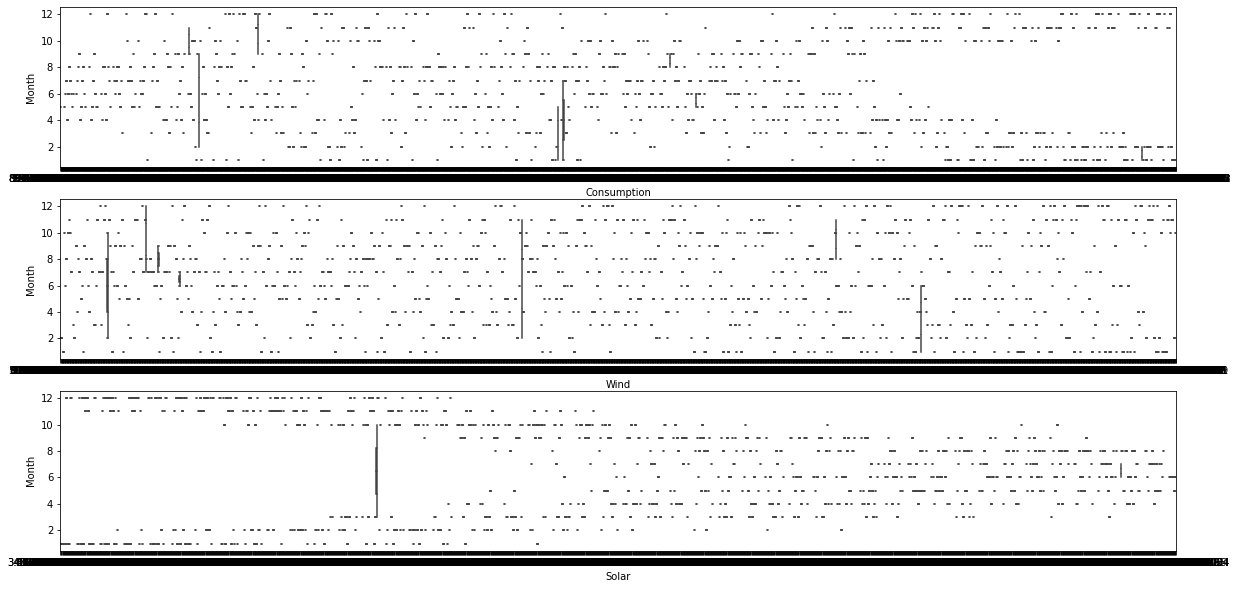

In [33]:
fig,axes=plt.subplots(3,1 ,figsize=(20,10))
for name , ax in zip(['Consumption','Wind','Solar'] , axes):
    sns.boxplot(data= data, x= name , y= 'Month', ax= ax)

<AxesSubplot:xlabel='Date'>

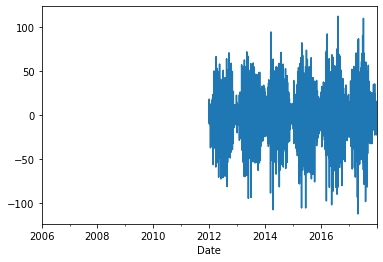

In [51]:
data['Solar'].diff().plot()

<AxesSubplot:>

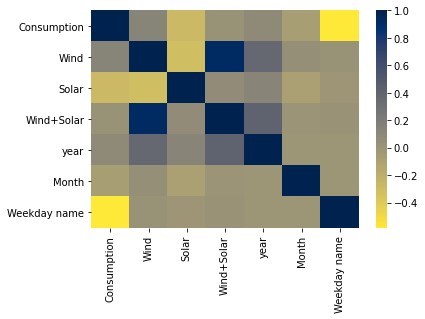

In [54]:
sns.heatmap(data.corr(), data = data,cmap='cividis_r',)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

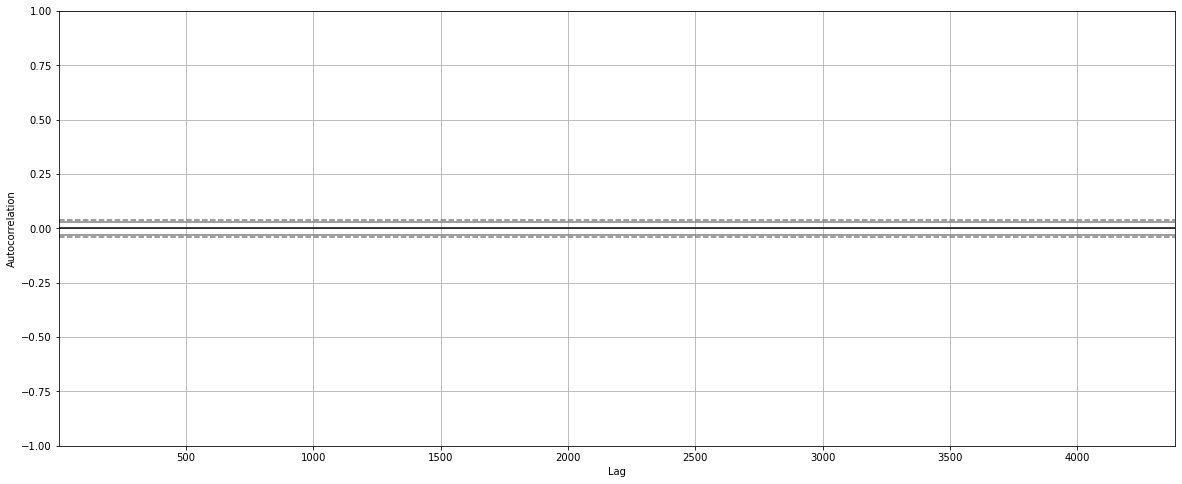

In [62]:
plt.figure(figsize=(20,8))
pd.plotting.autocorrelation_plot(data)